In [81]:
import matplotlib.pyplot as plt
import numpy as np

In [82]:
def rotate(points: np.ndarray, rad: float) -> np.ndarray:
    rotmat = np.array([np.cos(rad), -np.sin(rad), np.sin(rad), np.cos(rad)]).reshape(2, 2)
    return (rotmat @ points.T).T


In [83]:
r = np.random.normal(0, 1, 1000).reshape(-1, 1)
org = np.hstack((r, r * 0.05))
data = np.vstack((rotate(org, np.pi / 6), rotate(org, np.pi / 3)))

In [84]:
_, s, vt = np.linalg.svd(data)
evals = s**2
evecs = vt.T
idx = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:, idx]

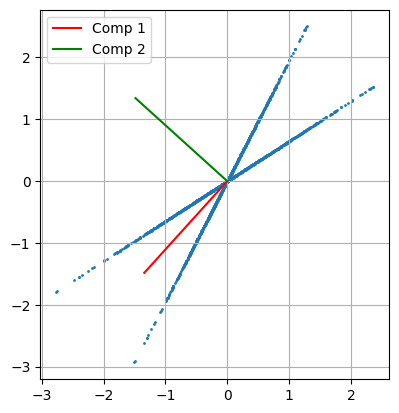

In [85]:
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=1.0, marker="o")
ax.plot([0, evecs[0, 0] * 2], [0, evecs[1, 0] * 2], label="Comp 1", color="r")
ax.plot([0, evecs[0, 1] * 2], [0, evecs[1, 1] * 2], label="Comp 2", color="g")
ax.set_aspect("equal")
ax.grid()
plt.legend()
plt.show()